<a href="https://colab.research.google.com/github/matheusglima/Python_Investing/blob/master/Backtest_carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando Bibliotecas**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [0]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

**Obtendo dados do Mercado**

In [113]:
tickers_ibov = ['B3SA3.SA', 'TAEE11.SA', 'ENBR3.SA', 'ITSA4.SA', 'WEGE3.SA', 'BPAC11.SA', 'SAPR4.SA', 'BBDC4.SA', 'ABEV3.SA', 'PRIO3.SA', 'IRBR3.SA', 'ODPV3.SA', 'WIZS3.SA']
carteira = yf.download(tickers=tickers_ibov, period='3y')['Adj Close']
carteira_new = carteira

ibov = yf.download(tickers='^BVSP', period='3y')['Adj Close']

[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  1 of 1 completed


In [101]:
carteira.dropna(how='all', inplace=True)
carteira.dropna(axis=1, inplace=True)
carteira

,ABEV3.SA,B3SA3.SA,BBDC4.SA,ENBR3.SA,ITSA4.SA,ODPV3.SA,PRIO3.SA,SAPR4.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,
2017-06-01,17.092888,17.041296,15.692520,11.425543,6.708688,10.965614,3.682000,1.957554,14.067456,16.794542
2017-06-02,17.111320,17.142405,15.478751,11.594810,6.747019,11.076190,3.661000,1.940516,13.971860,16.914450
2017-06-05,17.424612,17.142405,15.467251,11.510178,6.716354,11.057760,3.695000,1.936727,13.890987,16.487278
2017-06-06,17.572041,17.050484,15.673834,11.620199,6.808359,10.818177,3.708000,1.972696,13.795391,16.412336
2017-06-07,17.360109,17.243513,15.926426,11.679445,6.923361,11.103836,3.700000,1.968913,13.898349,16.487278
2017-06-08,17.074461,17.087252,15.685328,11.552493,6.869689,10.679955,3.695000,1.968913,13.780665,16.187511
2017-06-09,16.687452,17.050484,15.363915,11.340909,6.754687,11.057760,3.698000,1.995414,13.537947,15.190780
2017-06-12,16.659807,16.940186,15.117167,11.357837,6.754687,10.597022,3.750000,2.008670,13.464433,15.288203
2017-06-13,16.945457,17.050484,14.996662,11.467860,6.800692,10.670738,3.780000,2.020029,13.368837,14.876022


In [102]:
retorno = carteira.pct_change()
retorno

,ABEV3.SA,B3SA3.SA,BBDC4.SA,ENBR3.SA,ITSA4.SA,ODPV3.SA,PRIO3.SA,SAPR4.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-02,0.001078,0.005933,-0.013622,0.014815,0.005714,0.010084,-0.005703,-0.008704,-0.006796,0.007140
2017-06-05,0.018309,0.000000,-0.000743,-0.007299,-0.004545,-0.001664,0.009287,-0.001952,-0.005788,-0.025255
2017-06-06,0.008461,-0.005362,0.013356,0.009559,0.013699,-0.021667,0.003518,0.018572,-0.006882,-0.004545
2017-06-07,-0.012061,0.011321,0.016116,0.005099,0.016891,0.026405,-0.002157,-0.001917,0.007463,0.004566
2017-06-08,-0.016454,-0.009062,-0.015138,-0.010870,-0.007752,-0.038174,-0.001351,0.000000,-0.008467,-0.018182
2017-06-09,-0.022666,-0.002152,-0.020491,-0.018315,-0.016740,0.035375,0.000812,0.013460,-0.017613,-0.061574
2017-06-12,-0.001657,-0.006469,-0.016060,0.001493,0.000000,-0.041667,0.014062,0.006643,-0.005430,0.006413
2017-06-13,0.017146,0.006511,-0.007971,0.009687,0.006811,0.006956,0.008000,0.005655,-0.007100,-0.026961


In [103]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,B3SA3.SA,BBDC4.SA,ENBR3.SA,ITSA4.SA,ODPV3.SA,PRIO3.SA,SAPR4.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,
2017-06-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-06-02,1.001078,1.005933,0.986378,1.014815,1.005714,1.010084,0.994297,0.991296,0.993204,1.007140
2017-06-05,1.019407,1.005933,0.985645,1.007408,1.001143,1.008403,1.003531,0.989361,0.987456,0.981705
2017-06-06,1.028032,1.000539,0.998809,1.017037,1.014857,0.986555,1.007061,1.007735,0.980660,0.977242
2017-06-07,1.015633,1.011866,1.014906,1.022222,1.031999,1.012605,1.004889,1.005803,0.987979,0.981705
2017-06-08,0.998922,1.002697,0.999542,1.011111,1.023999,0.973950,1.003531,1.005803,0.979613,0.963855
2017-06-09,0.976280,1.000539,0.979060,0.992593,1.006857,1.008403,1.004345,1.019340,0.962359,0.904507
2017-06-12,0.974663,0.994067,0.963336,0.994074,1.006857,0.966387,1.018468,1.026112,0.957133,0.910308
2017-06-13,0.991375,1.000539,0.955657,1.003704,1.013714,0.973109,1.026616,1.031915,0.950338,0.885765


In [104]:
carteira = 10000 * retorno_acumulado
carteira['saldo'] = carteira.sum(axis=1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira

,ABEV3.SA,B3SA3.SA,BBDC4.SA,ENBR3.SA,ITSA4.SA,ODPV3.SA,PRIO3.SA,SAPR4.SA,WEGE3.SA,WIZS3.SA,saldo,retorno
Date,,,,,,,,,,,,
2017-06-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000,NaN
2017-06-02,10010.783793,10059.331492,9863.776527,10148.148457,10057.137118,10100.838560,9942.966027,9912.959832,9932.044350,10071.396634,100099.382791,0.000994
2017-06-05,10194.071458,10059.331492,9856.447967,10074.075063,10011.427139,10084.031699,10035.306930,9893.607964,9874.555253,9817.045132,99899.900096,-0.001993
2017-06-06,10280.322835,10005.391432,9988.092228,10170.369474,10148.570581,9865.545977,10070.613861,10077.349619,9806.599603,9772.422519,100185.278128,0.002857
2017-06-07,10156.334876,10118.662983,10149.055595,10222.223521,10319.992597,10126.050157,10048.886818,10058.026373,9879.788190,9817.045132,100896.066240,0.007095
2017-06-08,9989.219554,10026.967232,9995.416535,10111.110926,10239.989117,9739.495820,10035.306930,10058.026373,9796.131694,9638.554682,99630.218862,-0.012546
2017-06-09,9762.804527,10005.391432,9790.597880,9925.925771,10068.567101,10084.031699,10043.454733,10193.403582,9623.592542,9045.069168,98542.838435,-0.010914
2017-06-12,9746.631069,9940.667389,9633.358047,9940.741452,10068.567101,9663.865378,10184.682454,10261.120503,9571.334349,9103.078223,98114.045966,-0.004351
2017-06-13,9913.747507,10005.391432,9556.567081,10037.037532,10137.141309,9731.090215,10266.159836,10319.148094,9503.379377,8857.652720,98327.315101,0.002174


In [105]:
ibov = ibov.pct_change()
ibov_normalizado = (1 + ibov).cumprod()
ibov_normalizado.iloc[0] = 1
ibov_normalizado

Date
2017-06-01    1.000000
2017-06-02    1.003564
2017-06-05    1.002585
2017-06-06    1.010692
2017-06-07    1.014160
                ...   
2020-05-26    1.372136
2020-05-27    1.411903
2020-05-28    1.395897
2020-05-29    1.403185
2020-06-01    1.422725
Name: Adj Close, Length: 740, dtype: float64

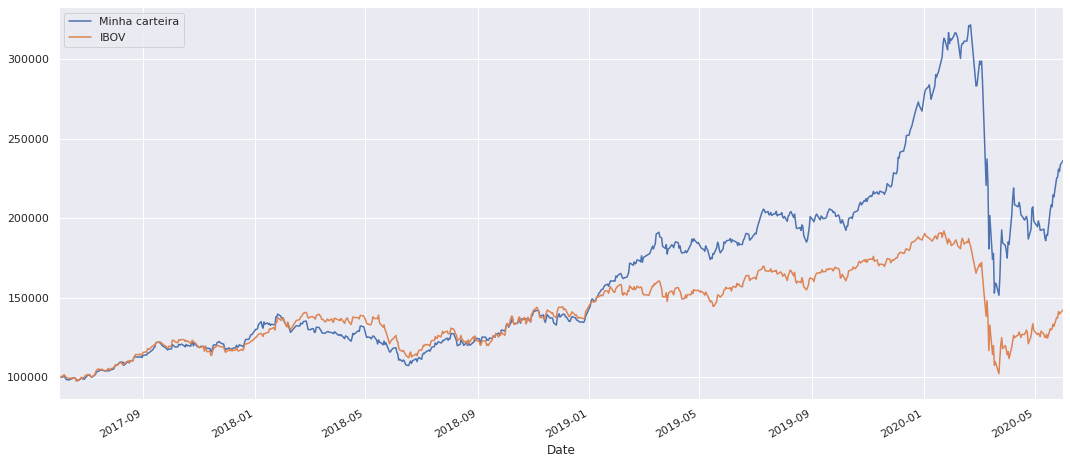

In [107]:
sns.set()
carteira['saldo'].plot(figsize=(18, 8), label='Minha carteira')
(ibov_normalizado * 100000).plot(label='IBOV')
plt.legend()

Start date,2017-06-01
End date,2020-06-01
Total months,35
,Backtest
Annual return,33.7%
Cumulative returns,136.2%
Annual volatility,33.5%
Sharpe ratio,1.04
Calmar ratio,0.64
Stability,0.82
Max drawdown,-52.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,52.91,2020-02-21,2020-03-23,NaT,NaN
1,23.17,2018-01-26,2018-06-18,2018-11-01,200
2,10.10,2019-07-10,2019-08-26,2019-09-20,53
3,9.03,2019-03-18,2019-05-13,2019-07-03,78
4,6.59,2018-11-05,2018-11-26,2019-01-02,43


Stress Events,mean,min,max
New Normal,0.14%,-18.59%,11.58%


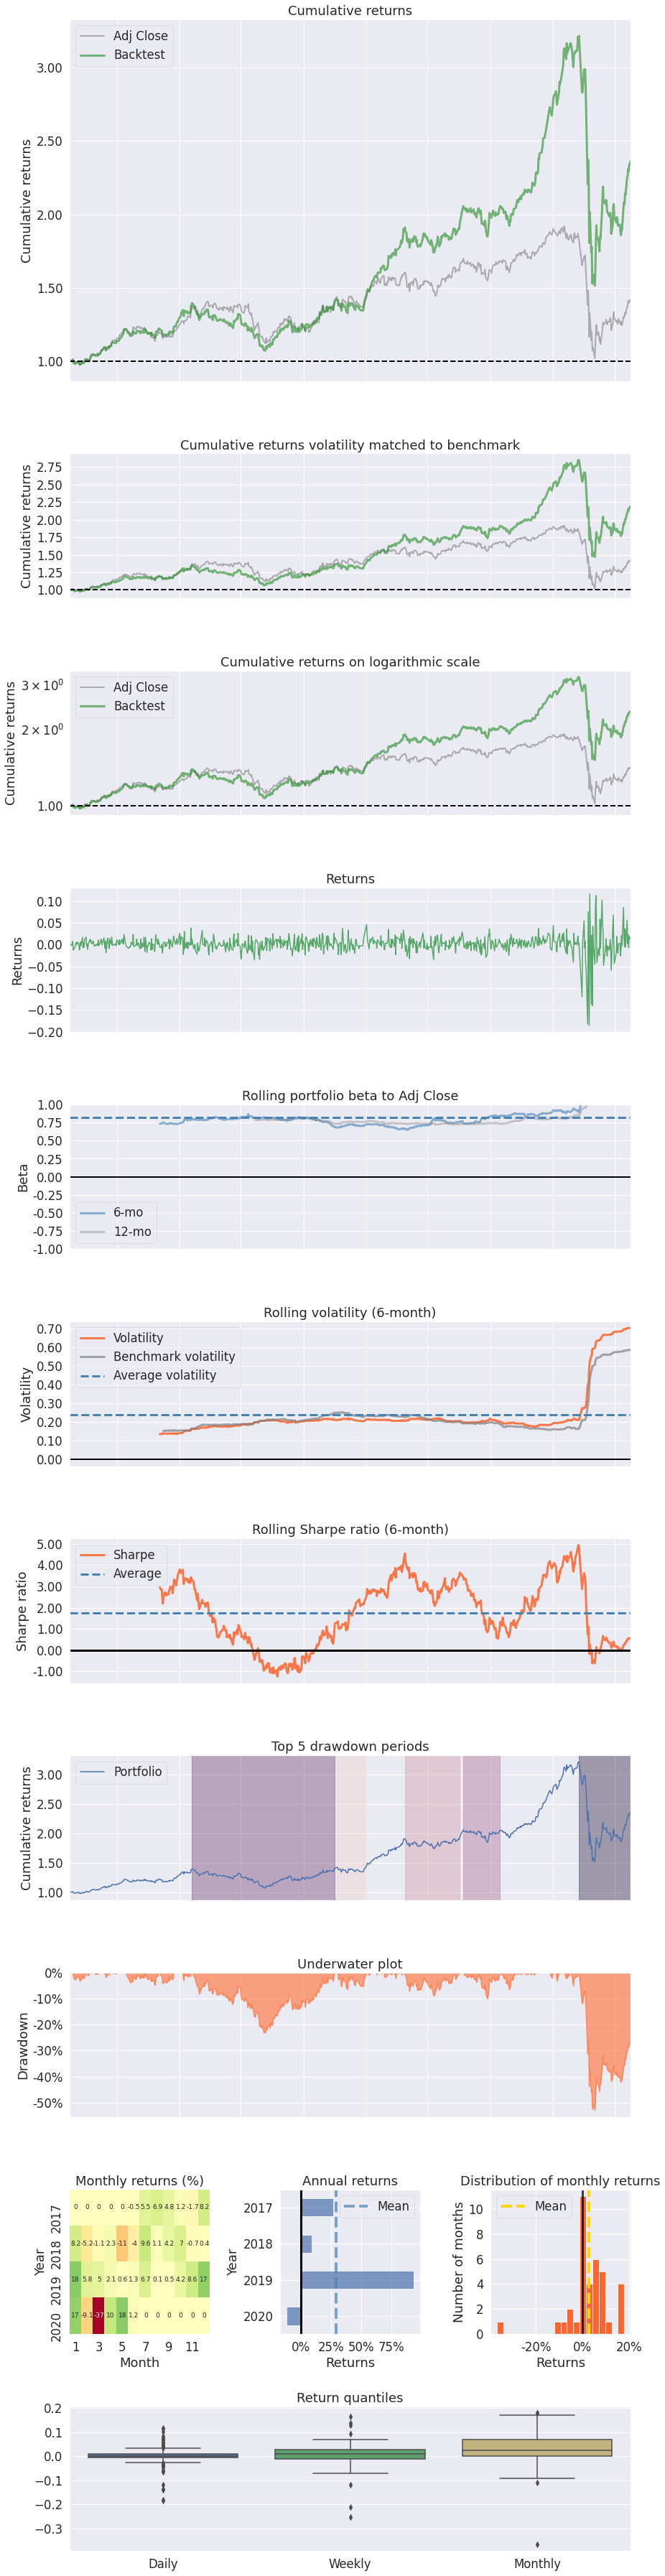

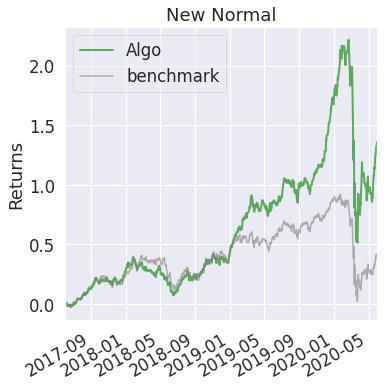

In [108]:
pf.create_full_tear_sheet(returns=carteira['retorno'], benchmark_rets=ibov)

In [119]:
carteira_normalizada = (carteira_new/carteira_new.iloc[0])
ibov_normalizado = (ibov/ibov.iloc[0])

Date
2017-06-01    1.000000
2017-06-02    1.003564
2017-06-05    1.002585
2017-06-06    1.010692
2017-06-07    1.014160
                ...   
2020-05-26    1.372136
2020-05-27    1.411903
2020-05-28    1.395897
2020-05-29    1.403185
2020-06-01    1.422725
Name: Adj Close, Length: 740, dtype: float64

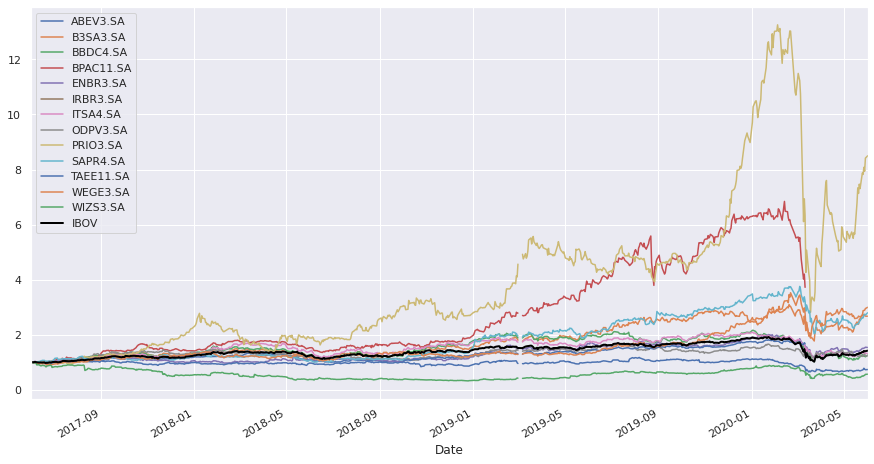

In [123]:
carteira_normalizada.plot(figsize=(15, 8))
ibov_normalizado.plot(linewidth=2, color='black', label='IBOV')
plt.legend()